In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from matplotlib import cm
from package.noncentroid import clusterize
from sklearn.cluster import KMeans
from package import compare

# Extract data

In [2]:
df_objects = pd.read_csv('data/objects.csv')

objects = df_objects[['x', 'y']].values
weights = df_objects['weight'].values
original_clusters = df_objects['cluster'].values

df_objects

,x,y,weight,cluster
0,-1.817920,3.272864,19,2
1,-3.882462,1.735035,8,2
2,-3.806913,3.420828,5,2
3,-4.702000,-1.610650,3,3
4,7.944321,4.061544,11,1
...,...,...,...,...
475,-4.243740,3.477219,5,2
476,-5.468267,-0.558428,30,3
477,7.134064,2.281312,16,1
478,6.404696,2.824189,12,1


In [3]:
distances = pd.read_csv('data/distances.csv', header=None).values

In [4]:
clusters = np.unique(original_clusters)
colormap = cm.turbo
cluster_colors = np.arange(len(clusters)) / (len(clusters)-1)
cluster_colors = [colormap(x) for x in cluster_colors]

# Noncentroid Clusterization

In [5]:
time_nc = time.time()
labels_nc = clusterize(dists=distances, weights=weights, n_clusters=4)
nc_clusters = np.argmax(labels_nc, axis=1)
time_nc = time.time() - time_nc

print('Done in {0:8.6f}'.format(time_nc))

Done in 3.885226


In [6]:
pd.DataFrame({'Original' : original_clusters, 'Predicted': nc_clusters})

,Original,Predicted
0,2,0
1,2,1
2,2,3
3,3,3
4,1,3
...,...,...
475,2,2
476,3,0
477,1,1
478,1,3


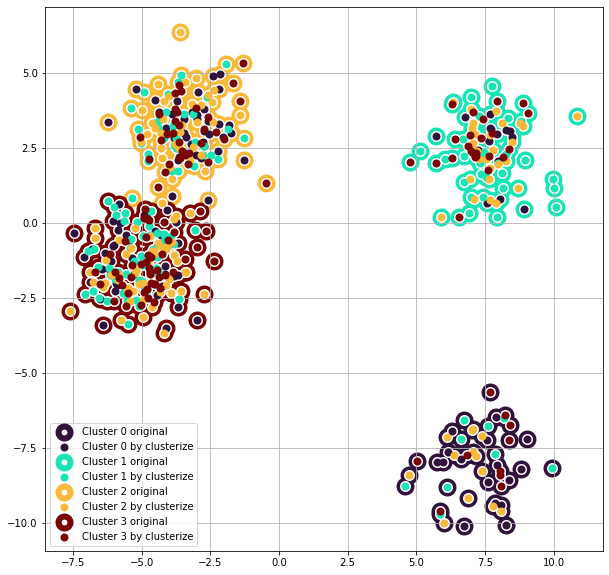

In [7]:
plt.figure(figsize=(10, 10))

for cluster in clusters:
    cluster_objects_original = objects[original_clusters == cluster]
    cluster_objects_predicted = objects[nc_clusters == cluster]
    
    x_or = cluster_objects_original[:, 0]
    y_or = cluster_objects_original[:, 1]
    x_pr = cluster_objects_predicted[:, 0]
    y_pr = cluster_objects_predicted[:, 1]
    
    col = cluster_colors[cluster]
    plt.scatter(x_or, y_or, linewidth=12, color='white', edgecolors=col, zorder=0, label='Cluster '+str(cluster)+' original')
    plt.scatter(x_or, y_or, linewidth=5, color='white', zorder=1)
    plt.scatter(x_pr, y_pr, linewidth=2, color=col, zorder=2, label='Cluster '+str(cluster)+' by clusterize')

plt.legend()
plt.grid(True)
plt.show()

In [8]:
df = pd.DataFrame({'Original' : original_clusters})
for cluster in clusters:
    df['P(cluster is ' + str(cluster) + ')'] = labels_nc[:, cluster]
df

,Original,P(cluster is 0),P(cluster is 1),P(cluster is 2),P(cluster is 3)
0,2,0.366953,0.170467,0.146950,0.315629
1,2,0.010358,0.417048,0.200350,0.372245
2,2,0.255701,0.259153,0.087918,0.397228
3,3,0.235557,0.279972,0.124785,0.359687
4,1,0.304602,0.258333,0.107824,0.329241
...,...,...,...,...,...
475,2,0.210600,0.287848,0.381232,0.120320
476,3,0.436260,0.259585,0.139730,0.164426
477,1,0.313267,0.419690,0.138552,0.128492
478,1,0.206763,0.100615,0.261271,0.431351


## Sklearn KMeans

## without weights

In [9]:
time_uw = time.time()
model = KMeans(n_clusters=4)
model.fit(objects)
predicted_clusters_uw = model.predict(objects)
time_uw = time.time() - time_uw

print('Done in {0:8.6f}'.format(time_uw))

Done in 0.112754


In [10]:
pd.DataFrame({'Original' : original_clusters, 'Predicted': predicted_clusters_uw})

,Original,Predicted
0,2,3
1,2,3
2,2,3
3,3,0
4,1,1
...,...,...
475,2,3
476,3,0
477,1,1
478,1,1


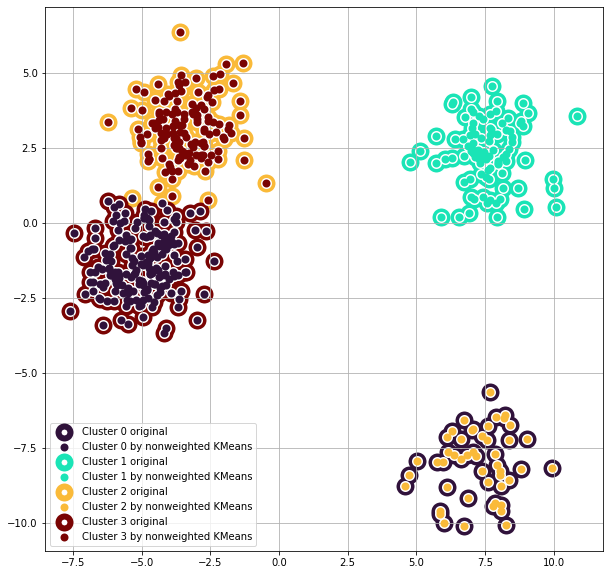

In [11]:
plt.figure(figsize=(10, 10))

for cluster in clusters:
    cluster_objects_original = objects[original_clusters == cluster]
    cluster_objects_predicted = objects[predicted_clusters_uw == cluster]
    
    x_or = cluster_objects_original[:, 0]
    y_or = cluster_objects_original[:, 1]
    x_pr = cluster_objects_predicted[:, 0]
    y_pr = cluster_objects_predicted[:, 1]
    
    col = cluster_colors[cluster]
    plt.scatter(x_or, y_or, linewidth=12, color='white', edgecolors=col, zorder=0, label='Cluster '+str(cluster)+' original')
    plt.scatter(x_or, y_or, linewidth=5, color='white', zorder=1)
    plt.scatter(x_pr, y_pr, linewidth=2, color=col, zorder=2, label='Cluster '+str(cluster)+' by nonweighted KMeans')

plt.legend()
plt.grid(True)
plt.show()

## with weights

In [12]:
time_ww = time.time()
model = KMeans(n_clusters=4)
model.fit(objects, sample_weight=weights)
predicted_clusters_ww = model.predict(objects)
time_ww = time.time() - time_ww

print('Done in {0:8.6f}'.format(time_ww))

Done in 0.069604


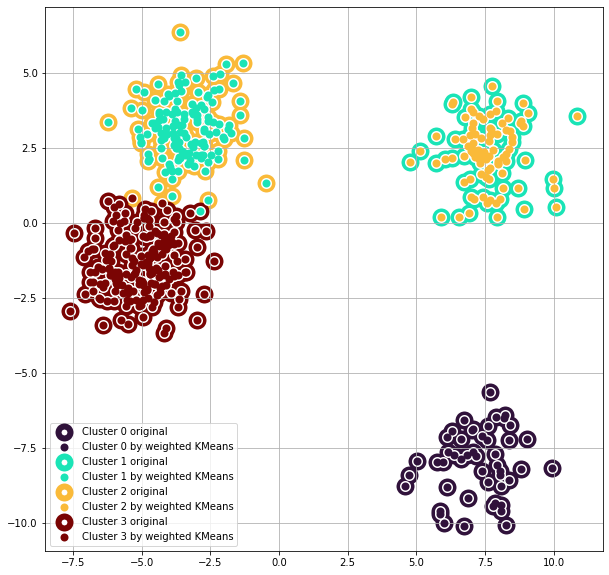

In [13]:
plt.figure(figsize=(10, 10))

for cluster in clusters:
    cluster_objects_original = objects[original_clusters == cluster]
    cluster_objects_predicted = objects[predicted_clusters_ww == cluster]
    
    x_or = cluster_objects_original[:, 0]
    y_or = cluster_objects_original[:, 1]
    x_pr = cluster_objects_predicted[:, 0]
    y_pr = cluster_objects_predicted[:, 1]
    
    col = cluster_colors[cluster]
    plt.scatter(x_or, y_or, linewidth=12, color='white', edgecolors=col, zorder=0, label='Cluster '+str(cluster)+' original')
    plt.scatter(x_or, y_or, linewidth=5, color='white', zorder=1)
    plt.scatter(x_pr, y_pr, linewidth=2, color=col, zorder=2, label='Cluster '+str(cluster)+' by weighted KMeans')

plt.legend()
plt.grid(True)
plt.show()

# Compare

In [14]:
print('NC-clusterization done in {0:6.4f} seconds.'.format(time_nc))
print('UW-clusterization done in {0:6.4f} seconds.'.format(time_uw))
print('WW-clusterization done in {0:6.4f} seconds.'.format(time_ww))

NC-clusterization done in 3.8852 seconds.
UW-clusterization done in 0.1128 seconds.
WW-clusterization done in 0.0696 seconds.


In [16]:
labels_or = compare.cluster_to_probability(original_clusters)
labels_uw = compare.cluster_to_probability(predicted_clusters_uw)
labels_ww = compare.cluster_to_probability(predicted_clusters_ww)

In [17]:
print('Compre Original and NC: {0:10.4f}'.format(compare.metric(labels_or, labels_nc)))
print('Compre Original and WW: {0:10.4f}'.format(compare.metric(labels_or, labels_ww)))
print('Compre Original and UW: {0:10.4f}'.format(compare.metric(labels_or, labels_uw)))

Compre Original and NC:   712.4081
Compre Original and WW:     8.0000
Compre Original and UW:     6.0000


In [18]:
print('Compre UW and WW: {0:10.4f}'.format(compare.metric(labels_uw, labels_ww)))
print('Compre NC and WW: {0:10.4f}'.format(compare.metric(labels_nc, labels_ww)))
print('Compre NC and UW: {0:10.4f}'.format(compare.metric(labels_nc, labels_uw)))

Compre UW and WW:     2.0000
Compre NC and WW:   711.5956
Compre NC and UW:   712.4401


__The result:__

We see, that results are not compareble and noncentroid clusterization is not so nice.

That can be two possible explanations:
1. Minimizing functions of each methods are not compareble
2. Probability matrix change alot